In [19]:
from keras.layers import Activation, Reshape, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Deconvolution2D
from keras.layers import Conv2DTranspose
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers

In [21]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint

In [22]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [5]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [6]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [7]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Dataset/Train_images/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [8]:
print(filenames)

['image_1.png', 'image_2.png', 'image_3.png', 'image_4.png', 'image_5.png', 'image_6.png', 'image_7.png', 'image_8.png', 'image_9.png', 'image_10.png', 'image_11.png', 'image_12.png', 'image_13.png', 'image_14.png', 'image_15.png', 'image_16.png', 'image_17.png', 'image_18.png', 'image_19.png', 'image_20.png', 'image_21.png', 'image_22.png', 'image_23.png', 'image_24.png', 'image_25.png', 'image_26.png', 'image_27.png', 'image_28.png', 'image_29.png', 'image_30.png', 'image_31.png', 'image_32.png', 'image_33.png', 'image_34.png', 'image_35.png', 'image_36.png', 'image_37.png', 'image_38.png', 'image_39.png', 'image_40.png', 'image_41.png', 'image_42.png', 'image_43.png', 'image_44.png', 'image_45.png', 'image_46.png', 'image_47.png', 'image_48.png', 'image_49.png', 'image_50.png', 'image_51.png', 'image_52.png', 'image_53.png', 'image_54.png', 'image_55.png', 'image_56.png', 'image_57.png', 'image_58.png', 'image_59.png', 'image_60.png', 'image_61.png', 'image_62.png', 'image_63.png', 

In [9]:
images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = "L")
    images.append(image)
    print(filename)

image_1.png
image_2.png
image_3.png
image_4.png
image_5.png
image_6.png
image_7.png
image_8.png
image_9.png
image_10.png
image_11.png
image_12.png
image_13.png
image_14.png
image_15.png
image_16.png
image_17.png
image_18.png
image_19.png
image_20.png
image_21.png
image_22.png
image_23.png
image_24.png
image_25.png
image_26.png
image_27.png
image_28.png
image_29.png
image_30.png
image_31.png
image_32.png
image_33.png
image_34.png
image_35.png
image_36.png
image_37.png
image_38.png
image_39.png
image_40.png
image_41.png
image_42.png
image_43.png
image_44.png
image_45.png
image_46.png
image_47.png
image_48.png
image_49.png
image_50.png
image_51.png
image_52.png
image_53.png
image_54.png
image_55.png
image_56.png
image_57.png
image_58.png
image_59.png
image_60.png
image_61.png
image_62.png
image_63.png
image_64.png
image_65.png
image_66.png
image_67.png
image_68.png
image_69.png
image_70.png
image_71.png
image_72.png
image_73.png
image_74.png
image_75.png
image_76.png
image_77.png
image_78

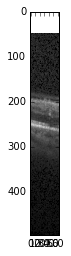

In [10]:
plt.imshow(images[0],cmap = "gray")

In [17]:
labels = np.load('resized_labels.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [18]:
len(labels_list)

770

In [19]:
np.unique(labels_list)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [24]:
train_labels = np.zeros((770,496,64,8))

In [25]:
for i in range(len(labels_list)) :
    for j in range(496) :
        for k in range(64):
            if(labels_list[i][j][k] == 0):
                train_labels[i][j][k][0] = 1
            if(labels_list[i][j][k] == 1):
                train_labels[i][j][k][1] = 1
            if(labels_list[i][j][k] == 2):
                train_labels[i][j][k][2] = 1
            if(labels_list[i][j][k] == 3):
                train_labels[i][j][k][3] = 1
            if(labels_list[i][j][k] == 4):
                train_labels[i][j][k][4] = 1
            if(labels_list[i][j][k] == 5):
                train_labels[i][j][k][5] = 1
            if(labels_list[i][j][k] == 6):
                train_labels[i][j][k][6] = 1
            if(labels_list[i][j][k] == 7):
                train_labels[i][j][k][7] = 1

In [26]:
train_labels.shape

(770, 496, 64, 8)

In [27]:
train_labels[0][0][0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [28]:
images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],496,64,1)

print(images[0].shape)
train_indices = np.random.choice(770,500,replace = False)
print(sorted(train_indices))
train_images_random = []
train_labels_random = []

for i in train_indices:
    train_images_random.append(images[i])
    train_labels_random.append(train_labels[i])

test_indices = [x for x in range(770) if x not in train_indices]
print(test_indices)
test_images = []
test_labels = []
for i in test_indices:
    test_images.append(images[i])
    test_labels.append(train_labels[i])

770
(496, 64, 1)
[4, 7, 9, 10, 13, 15, 17, 18, 20, 22, 25, 26, 30, 31, 33, 34, 35, 38, 40, 41, 42, 43, 44, 46, 49, 51, 52, 53, 54, 56, 57, 58, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 85, 89, 91, 92, 93, 94, 95, 97, 98, 100, 103, 104, 105, 107, 111, 113, 115, 117, 118, 119, 121, 122, 124, 126, 127, 130, 132, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 157, 158, 159, 160, 161, 163, 164, 165, 169, 170, 171, 173, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 190, 193, 194, 195, 196, 197, 200, 202, 203, 204, 205, 207, 210, 211, 212, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 227, 229, 231, 232, 233, 236, 238, 239, 240, 246, 247, 249, 253, 255, 256, 257, 258, 260, 261, 262, 263, 264, 267, 268, 269, 270, 275, 276, 277, 278, 279, 280, 281, 283, 284, 287, 288, 291, 292, 295, 297, 298, 299, 302, 303, 304, 306, 307, 308, 309, 313, 314, 317, 318, 319, 321, 322, 323, 324, 325, 327, 328, 329, 330, 332, 333, 334,

In [29]:
train_images = np.array(train_images_random)
train_labels = np.array(train_labels_random)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [30]:
train_images = train_images.astype('float32')
train_labels = train_labels.astype('float32')
test_images = test_images.astype('float32')
test_labels = test_labels.astype('float32')

In [31]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

(500, 496, 64, 1)
(270, 496, 64, 1)
(500, 496, 64, 8)


In [9]:
data_shape = 496*64

In [10]:
weight_decay = 0.0001

In [23]:
def get_frontend(input_width,input_height) :
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',name = 'conv1_1',input_shape =(input_width, input_height, 3)))
    model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',name = 'conv1_2'))
    model.add(MaxPooling2D(pool_size=(2,2),name = 'pool_1'))

    
    model.add(Conv2D(128,(3,3),activation='relu',padding = 'same',name = 'conv2_1'))
    model.add(Conv2D(128,(3,3),activation='relu',padding = 'same',name = 'conv2_2'))
    model.add(MaxPooling2D(pool_size=(2,2),name = 'pool_2'))
    
    model.add(Conv2D(256,(3,3),activation='relu',padding = 'same',name = 'conv3_1'))
    model.add(Conv2D(256,(3,3),activation='relu',padding = 'same',name = 'conv3_2'))
    model.add(Conv2D(256,(3,3),activation='relu',padding = 'same',name = 'conv3_3'))
    model.add(MaxPooling2D(pool_size=(2,2),name = 'pool_3'))
    
    model.add(Conv2D(512,(3,3),activation='relu',padding = 'same',name = 'conv4_1'))
    model.add(Conv2D(512,(3,3),activation='relu',padding = 'same',name = 'conv4_2'))
    model.add(Conv2D(512,(3,3),activation='relu',padding = 'same',name = 'conv4_3'))
    
    model.add(Conv2D(512,(3,3),activation='relu',dilation_rate= (2,2), padding = 'same',name = 'conv5_1'))
    model.add(Conv2D(512,(3,3),activation='relu',dilation_rate= (2,2), padding = 'same',name = 'conv5_2'))
    model.add(Conv2D(512,(3,3),activation='relu',dilation_rate= (2,2), padding = 'same',name = 'conv5_3'))
    
    
    model.add(Conv2D(4096,(7,7),dilation_rate= (4,4), padding = "same", activation='relu', name = "fc6"))
    model.add(Dropout(0.5))
    model.add(Conv2D(4096,(1,1),activation='relu',padding = "same",name = "fc7"))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(8,(1,1),activation='linear',name = 'fc-final'))
    
    return model
    
    

In [24]:
model = get_frontend(512,512)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 512, 512, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 512, 512, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 256, 256, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 256, 256, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 128, 128, 128)     0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 128, 128, 256)     295168    
__________

In [26]:
def add_softmax(model) :
    
    _, curr_width, curr_height, curr_channels = model.layers[-1].output_shape
    
  #  model.add(Reshape((data_shape,8),input_shape = (496,64,8)))
    model.add(Activation('softmax'))
    return model

In [27]:
model = get_frontend(512,512)
model = add_softmax(model)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 512, 512, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 512, 512, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 256, 256, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 256, 256, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 128, 128, 128)     0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 128, 128, 256)     295168    
__________

In [71]:
def add_context(model,no_of_classes) :
    
    model.add(Conv2D(no_of_classes*2,(3,3),padding = "same",activation = 'relu', name = "ct_conv1_1"))
    model.add(Conv2D(no_of_classes*2,(3,3),padding = "same",activation = 'relu', name = "ct_conv1_2"))

    model.add(Conv2D(no_of_classes*4,(3,3),padding = "same",dilation_rate = (2,2),activation = 'relu', name = "ct_conv2_1"))
    model.add(Conv2D(no_of_classes*8,(3,3),padding = "same",dilation_rate = (4,4),activation = 'relu', name = "ct_conv3_1"))
    model.add(Conv2D(no_of_classes*16,(3,3),padding = 'same', dilation_rate = (8,8),activation = 'relu', name = "ct_conv4_1"))
    model.add(Conv2D(no_of_classes*32,(3,3), padding = 'same',dilation_rate = (16,16),activation = 'relu', name = "ct_conv5_1"))
    
    model.add(Conv2D(no_of_classes*32,(3,3),padding = 'same', activation = 'relu', name = "ct_fc1"))
    
    model.add(Deconvolution2D(no_of_classes, kernel_size = (3,3), strides = (2,2), activation = "relu", name = "ct_deconv_1", padding = "same"))
    model.add(Deconvolution2D(no_of_classes, kernel_size = (3,3), strides = (2,2),activation = "relu", name = "ct_deconv_2", padding = "same"))
    model.add(Deconvolution2D(no_of_classes, kernel_size = (3,3), strides = (2,2),activation = "relu", name = "ct_deconv_3", padding = "same"))
    model.add(Conv2D(no_of_classes,(1,1),activation = 'relu', name = "ct_final"))
    return model

In [72]:
model = get_frontend(496,64)
model = add_context(model,8)
model = add_softmax(model)

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 496, 64, 64)       1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 496, 64, 64)       36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 248, 32, 64)       0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 248, 32, 128)      73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 248, 32, 128)      147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 124, 16, 128)      0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 124, 16, 256)      295168    
__________

In [18]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes= True)


In [44]:
weights_data = np.load("/home/iplab/Desktop/MajorProjectRelayNet/Multi-Scale-Context-Aggregation-by-Dilated-Convolutions/dilation8_pascal_voc.npy", encoding='latin1').item()

In [45]:
for layer in model.layers:
    if layer.name in weights_data.keys():
        layer_weights = weights_data[layer.name]
        layer.set_weights((layer_weights['weights'],layer_weights['biases']))
    else :
        print(layer.name)

KeyboardInterrupt: 

In [ ]:
weights = np.load('weighted_cropped_images.npy')

In [45]:
from PIL import Image

In [84]:
image_rgb = np.array(Image.open("/home/guru/Desktop/Webp.net-resizeimage.jpg")).astype(np.float32)

In [85]:
image_rgb.shape

(512, 512, 3)

In [86]:
mean = [102.93, 111.36, 116.52]

In [87]:
image = image_rgb[:, :, ::-1] - mean

In [88]:
image.shape

(512, 512, 3)

In [89]:
 image_size = image.shape

In [90]:
input_width, input_height = 512, 512
label_margin = 186
net_in = np.zeros((1, input_height, input_width, 3), dtype=np.float32)

In [54]:
output_height = input_height - 2 * label_margin
output_width = input_width - 2 * label_margin

In [91]:
mage = np.pad(image,
                   ((label_margin, label_margin),
                    (label_margin, label_margin),
                    (0, 0)), 'reflect')

In [92]:
margins_h = (0, input_height - image.shape[0])
margins_w = (0, input_width - image.shape[1])
image = np.pad(image,(margins_h,margins_w,(0, 0)), 'reflect')

In [119]:
net_in[0] = image
prob = model.predict(net_in)[0]

In [137]:
prob.shape

(64, 64, 21)

In [140]:
prob = np.pad(prob,((1,1),(1,1),(0,0)),'reflect')

In [141]:
prob.shape

(66, 66, 21)

In [145]:
def interp_map(prob, zoom, width, height):
    zoom_prob = np.zeros((height, width, prob.shape[2]), dtype=np.float32)
    for c in range(prob.shape[2]):
        for h in range(height):
            for w in range(width):
                r0 = h // zoom
                
                r1 = r0 + 1
                c0 = w // zoom
                c1 = c0 + 1
                rt = float(h) / zoom - r0
                ct = float(w) / zoom - c0
                #print(c0)
                v0 = rt * prob[r1, c0, c] + (1 - rt) * prob[r0, c0, c]
                v1 = rt * prob[r1, c1, c] + (1 - rt) * prob[r0, c1, c]
                zoom_prob[h, w, c] = (1 - ct) * v0 + ct * v1
    return zoom_prob

In [146]:
prob = interp_map(prob,8,512,512)

In [147]:
prediction = np.argmax(prob, axis=2)


In [148]:
prediction.shape

(512, 512)

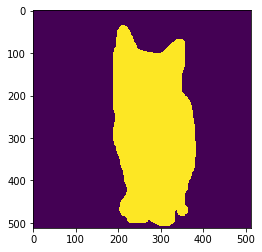

In [149]:
plt.imshow(prediction)